1.	Show all customers whose last names start with T. Order them by first name from A-Z.



In [ ]:
SELECT first_name,
		last_name
FROM customer
WHERE last_name LIKE 'T%'
ORDER BY first_name;

2.	Show all rentals returned from 5/28/2005 to 6/1/2005

In [ ]:
SELECT rental.return_date,
		film.title
FROM rental
	JOIN inventory 
		ON inventory.inventory_ID= rental.inventory_id
	JOIN film 
		ON film.film_id = inventory.film_id
WHERE rental.return_date
	BETWEEN'5/28/2005' AND '6/1/2005'
ORDER BY return_date;

3.	How would you determine which movies are rented the most?



In [ ]:
SELECT film.title,
		COUNT(rental.inventory_id) 
			AS times_rented
FROM rental
	JOIN inventory 
		ON inventory.inventory_ID = rental.inventory_id
	JOIN film 
		ON film.film_id = inventory.film_id
GROUP BY film.title
ORDER BY times_rented DESC;

4.	Show how much each customer spent on movies (for all time) . Order them from least to most.

In [ ]:
SELECT rental.customer_id,
	   SUM(CAST(payment.amount AS money)) AS total_spent
FROM payment
	JOIN rental
		ON payment.customer_id = rental.customer_id
GROUP BY rental.customer_id
ORDER BY total_spent DESC;

5.	Which actor was in the most movies in 2006 (based on this dataset)? Be sure to alias the actor name and count as a more descriptive name. Order the results from most to least.

In [ ]:
SELECT CONCAT(a.first_name,' ',a.last_name) AS actor,
		COUNT(fm.film_id) AS movie_count_2006
FROM actor AS a
	JOIN film_actor AS fa
		ON a.actor_id = fa.actor_id
	JOIN film AS fm
		ON fa.film_id = fm.film_id
WHERE fm.release_year = 2006
GROUP BY actor
ORDER BY movie_count_2006 DESC;

6.	Write an explain plan for 4 and 5. Show the queries and explain what is happening in each one. Use the following link to understand how this works http://postgresguide.com/performance/explain.html 

In [ ]:
Explain Plan for # 4

--"1. ->  Sort  (cost=6655.97..6657.46 rows=599 width=10)"
--			SORT using SORT KEY
--			Cost (6655.97) = the amount of time between when the component starts reading the data 
--              and when the component outputs its first row.
--        	Max Time (6657.46) = represents the total amount of time it took to run the component
--        	Rows (599) = number of rows gone through
--		  	Width (10)= number of columns gone through
--"2  ->  Sort Key: (sum((payment.amount)::money)) DESC"
--			Create SORT KEY from the MONEY column, created from the SUM of the AMOUNT in the PAYMENT TABLE
--"3  ->  Finalize GroupAggregate  (cost=6550.46..6628.33 rows=599 width=10)"
--			GROUP/AGGREGATE component				
--"4  ->  Group Key: rental.customer_id"
--			Create GROUP KEY from the CUSTOMER_ID column on the RENTAL TABLE
--"5  ->  Gather Merge  (cost=6550.46..6619.35 rows=599 width=10)"
--			MERGE on the sort
--"6  ->  Workers Planned: 1"
--"7  ->  Sort  (cost=5550.45..5551.95 rows=599 width=10)"
--			Carry out the Stort
--"8  ->  Sort Key: rental.customer_id"
--			Create SORT KEY from CUSTOMER_ID on the RENTAL TABLE
--"9  ->  Partial HashAggregate  (cost=5516.83..5522.82 rows=599 width=10)"
--			Hash the Aggrigate from the GROUP KEY
--"10 ->  Group Key: rental.customer_id"
-- 			Create GROUP KEY from CUSTOMER_ID on the RENTAL TABLE
--"11 ->  Hash Join  (cost=436.70..3761.84 rows=233998 width=8)"
--			Join on the HASHES
--"12 ->  Hash Cond: (rental.customer_id = payment.customer_id)"
--			HASH - map CUSTOMER_ID on the RENTAL TABLE and PAYMENT TABLE
--"13 ->  Parallel Index Only Scan using idx_unq_rental_rental_date_inventory_id_customer_id on rental  (cost=0.29..430.88 rows=9438 width=2)"
--			Index RENTAL TABLE 
--"14 ->  Hash  (cost=253.96..253.96 rows=14596 width=8)"
-- 			Startup HASH function maps any database value to a 32-bit integer
--"15 ->  Seq Scan on payment  (cost=0.00..253.96 rows=14596 width=8)"
-- 			Start by Sequentially scanning PAYMENT TABLE
--			Cost (0.00) - amount of time between component startup and looking at first row
--          Max Time (253.96) - total time of component execution
--          Rows (14596) - scanned 14,596 rows
--          Width (8) - columns scanned

In [ ]:
Explain plan for # 5

--   This query ran faster than the one before it.
--"1 ->  Sort  (cost=246.20..246.52 rows=128 width=40)"
--			SORT using SORT KEY
--			Cost (246.20) = the amount of time between when the component starts reading the data 
--              and when the component outputs its first row.
--        	Max Time (246.52) = represents the total amount of time it took to run the component
--        	Rows (128) = number of rows gone through
--		  	Width (40)= number of columns gone through
--"2  ->  Sort Key: (count(fm.film_id)) DESC"
--			Sort key created from the count of FILM_ID from the FILM Table
--"3  ->  HashAggregate  (cost=240.12..241.72 rows=128 width=40)"
--			Hash/Aggregate using the GROUP KEY
--"4  ->  Group Key: concat(a.first_name, ' ', a.last_name)"
--			GROUP KEY created from the concatenation of the FIRST_NAME and LAST NAME from the ACTORS Table
--"5  ->  Hash Join  (cost=85.50..212.81 rows=5462 width=36)"
--			Join on Hash Condition - film_id
--"6  ->  Hash Cond: (fa.film_id = fm.film_id)"
--			Create Hash Condition Indexing where the FILM_ID matches on the FILM ACTOR TABLE, and FILM TABLE
--"7  ->  Hash Join  (cost=6.50..105.76 rows=5462 width=15)"
--			Join on Hash Condition actor_id
--"8  ->  Hash Cond: (fa.actor_id = a.actor_id)"
--			Create Hash Condition Indexing where ACTOR_ID matches on FILM ACTOR TABLE and ACTOR TABLE
--"9  ->  Seq Scan on film_actor fa  (cost=0.00..84.62 rows=5462 width=4)"
--			Sequencially scan the FILM ACTOR Table
--"10 ->  Hash  (cost=4.00..4.00 rows=200 width=17)"
--			Index ACTOR TABLE
--"11 ->  Seq Scan on actor a  (cost=0.00..4.00 rows=200 width=17)"
--			Sequecially scan ACTOR TABLE
--"12 ->  Hash  (cost=66.50..66.50 rows=1000 width=4)"
--			Index FILM TABLE
--"13 ->  Seq Scan on film fm  (cost=0.00..66.50 rows=1000 width=4)"
--			Sequecially scan FILM TABLE
--"14 ->  Filter: ((release_year)::integer = 2006)"
--			Create a filter for release_year of 2006


7.	What is the average rental rate per genre?

In [ ]:
SELECT c.name,
		COUNT(r.rental_id) AS rental_count,
		ROUND(COUNT(*) * 100.0/ SUM(COUNT(*)) OVER(),2)
			 AS rental_percent
FROM rental AS r
	JOIN inventory AS i
		ON r.inventory_id = i.inventory_id
	JOIN film_category AS fc
		ON i.film_id = fc.film_id
	JOIN category AS c
		ON fc.category_id = c.category_id
GROUP BY c.name
ORDER BY rental_percent DESC;

8.	How many films were returned late? Early? On time?

In [ ]:
SELECT CASE WHEN CAST(r.return_date AS date) 
				> (r.rental_date:: date + f.rental_duration) THEN 'Late'
			WHEN CAST(r.return_date AS date) 
				< (r.rental_date:: date + f.rental_duration) THEN 'Early'
			WHEN CAST(r.return_date AS date) 
				= (r.rental_date:: date + f.rental_duration) THEN 'On Time'
		ELSE 'Not Yet Returned'
		END AS return_status,
		COUNT(rental_id) AS status_count
FROM rental AS r
	JOIN inventory AS i
		ON r.inventory_id = i.inventory_id
	JOIN film AS f
		ON i.film_id = f.film_id
GROUP BY return_status
ORDER BY status_count DESC;

9.	What categories are the most rented and what are their total sales?

In [ ]:
SELECT c.name,
		COUNT(r.rental_id) AS total_rentals,
		SUM(f.rental_rate) AS total_sales
FROM rental AS r
	JOIN inventory AS i
		ON r.inventory_id = i.inventory_id
	JOIN film AS f
		ON i.film_id = f.film_id
	JOIN film_category AS fc
		ON f.film_id = fc.film_id
	JOIN category as c
		ON fc.category_id = c.category_id
GROUP BY c.name
ORDER BY total_rentals DESC;

10.	Create a view for 8 and a view for 9. Be sure to name them appropriately. 

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# import data
returns = pd.read_csv('DVD_return_rate.csv')

# make a data frame
returns_df = pd.DataFrame(returns)

print(returns_df)

      return_status  status_count
0              Late          7269
1             Early          6864
2           On Time          1728
3  Not Yet Returned           183


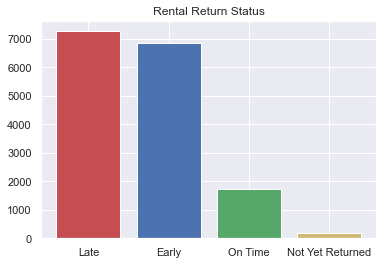

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# import data
returns = pd.read_csv('DVD_return_rate.csv')

# make a data frame
returns_df = pd.DataFrame(returns)

plt.bar(returns_df['return_status'], returns_df['status_count'], color = ('r','b','g','y'), label = 'Return Status')

plt.title("Rental Return Status")
plt.show()

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data
rentals = pd.read_csv('DVD_category_rental_sales.csv')

# make a data frame
rental_df = pd.DataFrame(rentals)

print(rental_df)


           name  total_rentals  total_sales
0        Sports           1179      3617.21
1     Animation           1166      3218.34
2        Action           1112      2966.88
3        Sci-Fi           1101      3289.99
4        Family           1096      2959.04
5         Drama           1060      3373.40
6   Documentary           1050      2747.50
7       Foreign           1033      3050.67
8         Games            969      3033.31
9      Children            945      2541.55
10       Comedy            941      3089.59
11          New            940      2904.60
12     Classics            939      2477.61
13       Horror            846      2623.54
14       Travel            837      2776.63
15        Music            830      2541.70


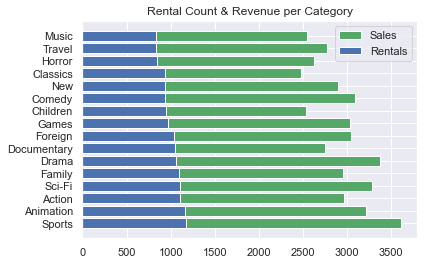

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# import data
rentals = pd.read_csv('DVD_category_rental_sales.csv')

# make a data frame
rental_df = pd.DataFrame(rentals)

# make horizontal bar within bar
plt.barh(rental_df['name'], rental_df['total_sales'], color = 'g', label = 'Sales')
plt.barh(rental_df['name'], rental_df['total_rentals'], color = 'b', label = 'Rentals')

plt.title('Rental Count & Revenue per Category')
plt.legend()
plt.show()
